In [79]:
%matplotlib notebook
import numpy as np, numpy.random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pyomo.environ import *
import time
import random
import logging
logging.getLogger('pyomo.core').setLevel(logging.ERROR)

In [27]:
def corrigir(a):
    for x in ['[', ']', ',']:
        a = a.replace(x, '')
    a = a.split(' ')
    lista= list(map(int, a))
    return lista

def leitura(arquivo):
    data = np.loadtxt(arquivo, delimiter='\t',dtype=str)
    # Lista com os valores da importância de cada item r em relação a cada objetivo j
    v = []
    for i in range(int(data[0])):
        mudança1 = corrigir(data[3+i])
        v.append(mudança1)
    w = corrigir(data[3+int(data[0])])
    
    return int(data[0]), int(data[1]), int(data[2]), v, w

In [28]:
def peso_discretizacao(fun):
    discretizacoes = np.arange(0.0 ,1.1, 0.1)
    pesos_w = []
    if fun == 3:
        for W1 in discretizacoes:
            for W2 in discretizacoes:  
                W3 = 1 - (W1 + W2)
                if W1 >= 0 and W2 >= 0 and W3 >= 0:
                    pesos_w.append([W1, W2, W3])
    elif fun == 4:
        for W1 in discretizacoes:
            for W2 in discretizacoes:
                for W3 in discretizacoes:   
                    W4 = 1 - (W1 + W2 + W3)
                    if W1 >= 0 and W2 >= 0 and W3 >= 0 and W4 >= 0:
                        pesos_w.append([W1, W2, W3, W4])    
    elif fun == 5:
        for W1 in discretizacoes:
            for W2 in discretizacoes:
                for W3 in discretizacoes:
                    for W4 in discretizacoes:
                        W5 = 1 - (W1 + W2 + W3 + W4)
                        if W1 >= 0 and W2 >= 0 and W3 >= 0 and W4 >= 0 and W5 >= 0:
                            pesos_w.append([W1, W2, W3, W4, W5])
    return pesos_w

In [29]:
def modelo_metodoPonderacoes(pesos_W, fun, N, v, w, W):
    p = ConcreteModel()
    
    # Inicializa o problema p que será resolvido com o solver
    p.Itens = range(N)
    
    # x é uma lista de variáveis
    p.x = Var(p.Itens, within = Binary)     
    
    # Restrição soma wi*xi <= W
    p.restricao = Constraint(expr=sum(w[i]*p.x[i] for i in p.Itens) <= W)
       
    # Função Objetivo
    p.f = np.empty(0, dtype=object)
    for j in range(fun):
        p.f = np.append(p.f, sum(v[j][r]*p.x[r] for r in p.Itens))
    
    # declaro a função-objetivo
    p.objective = Objective(expr = sum(pesos_W[j]*p.f[j] for j in range(fun)), sense=maximize)
    
    # Resolve
    solver = SolverFactory('glpk')
    solver.solve(p, tee=False)

    return list(p.f[j]() for j in range(fun))

In [30]:
def metodoPonderacoes(fun, N, v, w, W):
    inicio = time.time()
    pontosf = []
    pesos_W = peso_discretizacao(fun)
    for i in range(len(pesos_W)): 
        ponto = modelo_metodoPonderacoes(pesos_W[i], fun, N, v, w, W)
        pontosf.append(ponto)         
    fim = time.time()
    return pontosf, fim - inicio

In [71]:
def resultado_poderacoes(arquivo):
    fun, N, W, v, w = leitura(arquivo)
    pontosf, tempo1 = metodoPonderacoes(fun, N, v, w, W)
    print('***Método das Ponderações***')
    print(f'Pontos: {len(pontosf)}')
    print("________________________________")
    print("Tempo de execução: ", tempo1)
    print("Média: ", np.mean(pontosf))
    print("Desvio: ", np.std(pontosf))
    print("Melhor Indivíduo: ")
    print("Pior Indivíduo: ")
    
    if fun == 3:
        fig2 = plt.figure()         
        ax2 = Axes3D(fig2)
        for i in range(len(pontosf)):
            ax2.scatter(pontosf[i][0], pontosf[i][1], pontosf[i][2], c='black') 
        ax2.text2D(0.10, 0.95, "Espaço de Decisão Método das Poderações", transform=ax2.transAxes, fontsize=14)
        ax2.set_xlabel('x')
        ax2.set_ylabel('y')
        ax2.set_zlabel('z')    
        plt.show()
    else:
        pass

***Método das Ponderações***
Pontos: 66
________________________________
Tempo de execução:  3.1968722343444824
Média:  3552.510101010101
Desvio:  555.2413411010266
Melhor Indivíduo: 
Pior Indivíduo: 


<IPython.core.display.Javascript object>


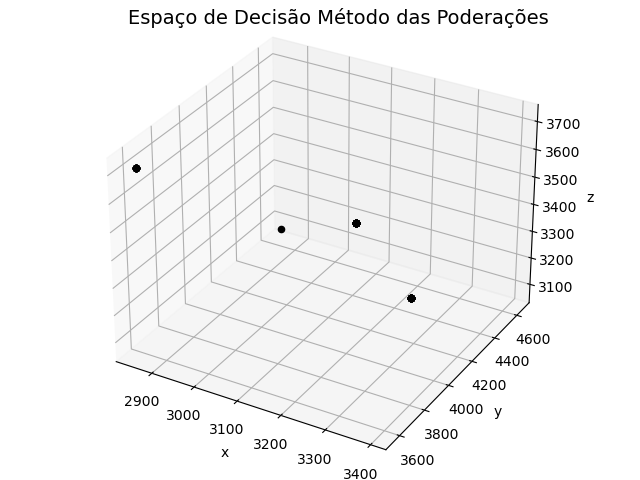

In [72]:
resultado_poderacoes(arquivo='KP_p-3_n-10_ins-1.dat')

***Método das Ponderações***
Pontos: 66
________________________________
Tempo de execução:  3.6848254203796387
Média:  10555.888888888889
Desvio:  1160.739675256656
Melhor Indivíduo: 
Pior Indivíduo: 


<IPython.core.display.Javascript object>


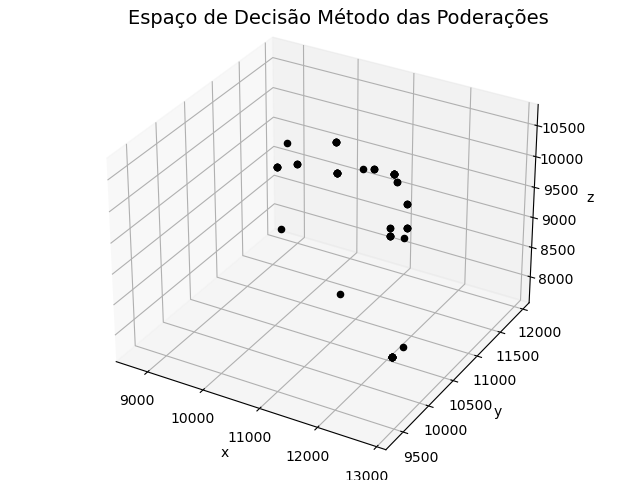

In [73]:
resultado_poderacoes(arquivo='KP_p-3_n-30_ins-1.dat')

***Método das Ponderações***
Pontos: 66
________________________________
Tempo de execução:  4.191939115524292
Média:  33943.38383838384
Desvio:  3772.1485684374984
Melhor Indivíduo: 
Pior Indivíduo: 


<IPython.core.display.Javascript object>


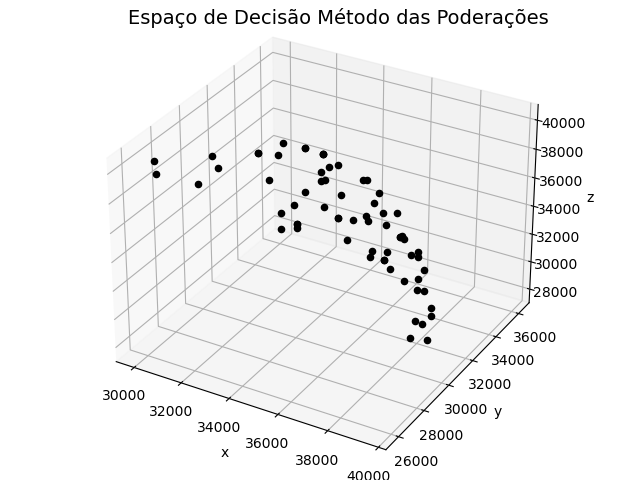

In [74]:
resultado_poderacoes(arquivo='KP_p-3_n-100_ins-1.dat')

In [75]:
resultado_poderacoes(arquivo='KP_p-4_n-10_ins-1.dat')

***Método das Ponderações***
Pontos: 282
________________________________
Tempo de execução:  14.283990859985352
Média:  3262.5186170212764
Desvio:  383.6215347486505
Melhor Indivíduo: 
Pior Indivíduo: 


In [76]:
resultado_poderacoes(arquivo='KP_p-4_n-20_ins-1.dat')

***Método das Ponderações***
Pontos: 282
________________________________
Tempo de execução:  15.619930982589722
Média:  7097.704787234043
Desvio:  882.1695927267571
Melhor Indivíduo: 
Pior Indivíduo: 


In [77]:
resultado_poderacoes(arquivo='KP_p-5_n-10_ins-1.dat')

***Método das Ponderações***
Pontos: 975
________________________________
Tempo de execução:  50.468809604644775
Média:  3145.5776410256412
Desvio:  647.7600190895124
Melhor Indivíduo: 
Pior Indivíduo: 


In [78]:
resultado_poderacoes(arquivo='KP_p-5_n-20_ins-10.dat')

***Método das Ponderações***
Pontos: 975
________________________________
Tempo de execução:  56.71797847747803
Média:  6069.546256410256
Desvio:  1344.697450163318
Melhor Indivíduo: 
Pior Indivíduo: 


# NSGA-II

In [87]:
def inicializaPopulacao(VAR, TP):
    populacao = np.random.randint(2, size=(TP, VAR))  # matriz TP linhas VAR colunas
    return populacao


# Kursawe function - https://en.wikipedia.org/wiki/Test_functions_for_optimization
def avalia_populacao(populacao, fun, VAR, v, W, w):
    TPtotal = populacao.shape[0]  # qtde de linhas da populacao
    funcoes = np.zeros((TPtotal, fun)) # 3 funções-objetivo
    for j in range(fun):
        funcoes[:, j] = sum(v[j][r]*populacao[:, r] for r in range(VAR))
    
    # Penalizar toda população
    #print(W,  sum(w[r]*populacao[:, r] for r in range(VAR)))
    # Os indivíduos que apresentarem valores acima de W apresentam resultados positivos e W abaixo ou igual são negativos
    penalidade = 100*(W - sum(w[r]*populacao[:, r] for r in range(VAR)))
    #print(penalidade)
    # Valores Positivos são mantidos e valores negativos são transformados em zero  
    penalidade = np.where(penalidade < 0, penalidade, 0)
    #print(penalidade)
    # é criado uma nova matriz que repete os valores da penalidade
    # Essa matriz será utilizada para somar com os valores de fitness da população avaliada
    penalidade = np.repeat(penalidade[:, np.newaxis], funcoes.shape[1], axis=1)
    #print(penalidade)
    #print(funcoes + penalidade)
    
    return funcoes + penalidade

# 2 pais são aleatoriamente selecionados da populacao
# gerando 2 filhos através de crossover aritmético
def crossover(populacao, TX_crossover, TP, VAR):
    filhos = np.zeros((TX_crossover, VAR), dtype=int)
    for i in range(int(TX_crossover/2)):
        r1 = np.random.randint(0, TP)   # intervalo [0, TP)
        r2 = np.random.randint(0, TP)
        while r1 == r2:
            r2 = np.random.randint(0, TP)
        ponto = random.randint(1, VAR-1)
        filhos[2*i] = list(populacao[r1][:ponto]) + list(populacao[r2][ponto:])
        filhos[2*i+1] = list(populacao[r2][:ponto]) + list(populacao[r1][ponto:])     

    return filhos 


# 1 individuo da populacao é selecionado aleatoriamente
# gerando um individuo através de uma perturbação em uma das variáveis
def busca_local(populacao, TX_busca_local, TP, VAR):
    filhos = np.zeros((TX_busca_local, VAR))
    for i in range(TX_busca_local):
        ind = np.random.randint(0, TP)
        individuo = populacao[ind, :]
        
        v = np.random.randint(0, VAR)
        individuo[v] = 1 - individuo[v]
        filhos[i,:] = individuo
    return filhos


# gerando 2 filhos através de troca de coordenadas
def mutacao(populacao, TX_mutacao, TP, VAR):
    filhos = np.zeros((TX_mutacao, VAR), dtype=int)
    for i in range(int(TX_mutacao/2)):
        r1 = np.random.randint(0, TP)
        r2 = np.random.randint(0, TP)
        while r1 == r2:
            r2 = np.random.randint(0, TP)
        var_troca = np.random.randint(0, VAR)
        filhos[2*i] = populacao[r1]
        filhos[2*i, var_troca] = populacao[r2, var_troca]
        filhos[2*i+1] = populacao[r2]
        filhos[2*i+1, var_troca] = populacao[r1, var_troca]

    return filhos


def crowding(fitness):
    tam_pop = len(fitness[:, 0])   # quantidade de pontos
    funcoes = len(fitness[0, :])   # quantidade de funções-objetivo               
    matriz_crowding = np.zeros((tam_pop, funcoes))  
    # fitness.ptp(0) array com máximos de cada coluna
    fitness_normalizado = (fitness - fitness.min(0))/fitness.ptp(0)
    
    # para cada função-objetivo
    for i in range(funcoes):
        crowding_resultado = np.zeros(tam_pop)
        
        # pontos extremos tem o maior resultado de crowding
        crowding_resultado[0] = 1             
        crowding_resultado[tam_pop - 1] = 1    
        
        fitness_normalizado_ordenado = np.sort(fitness_normalizado[:,i])
        indices_fitness_normalizado = np.argsort(fitness_normalizado[:,i])
        
        # crowding distance: solução i, crowding = fitness[i+1] - fitness[i-1]
        crowding_resultado[1:tam_pop-1] = (fitness_normalizado_ordenado[2:tam_pop] - fitness_normalizado_ordenado[0:tam_pop-2])
        reordenar = np.argsort(indices_fitness_normalizado)
        matriz_crowding[:, i] = crowding_resultado[reordenar]
    
    crowding_distance = np.sum(matriz_crowding, axis=1) 

    return crowding_distance   


def seleciona_com_crowding(fitness, qtde):
    # atribui índices às soluções sob análise: da última fronteira
    indices = np.arange(fitness.shape[0])
    
    # soluções que serão selecionadas
    solucoes_selecionadas = np.zeros(qtde)
    
    # calcula o crowding distance
    crowding_distance = crowding(fitness)
    
    crowding_distance_ordenado = -np.sort(-crowding_distance)
    indices_ordenado = np.argsort(-crowding_distance)
    
    # para a quantidade que deve ser selecionada
    for i in range(qtde):
        solucoes_selecionadas[i] = indices_ordenado[i]
        
    solucoes_selecionadas = np.array(solucoes_selecionadas, dtype=int)

    return solucoes_selecionadas


# encontrar o índice das soluções não-dominadas 
def encontra_fronteira(fitness, indices):
    tam_pop = fitness.shape[0]
    fronteira_nd = np.ones(tam_pop, dtype=bool)    # todos True=1 inicialmente
    for i in range(tam_pop):
        for j in range(tam_pop):
            # MazimizaçãO!
            # j não é pior que i em nenhum dos objetivos e é melhor em pelo menos um
            if all(fitness[j] >= fitness[i]) and any(fitness[j] > fitness[i]):
                # i não faz parte da fronteira de Pareto porque j domina i
                fronteira_nd[i] = 0               # muda para False=0
                break
                
    return indices[fronteira_nd] 

def selecao(populacao, fitness, TP):
    
    # índices ainda não selecionados
    indices_nao_selec = np.arange(populacao.shape[0])  
    
    # todos os índices
    indices = np.arange(populacao.shape[0])  
    
    # fronteira não-dominada
    fronteira_nd_indices = []
    
    # enquanto a fronteira for menor que TP
    while len(fronteira_nd_indices) < TP:
        # encontra a nova fronteira, dentre os índices não selecionados
        nova_fronteira = encontra_fronteira(fitness[indices_nao_selec, :], indices_nao_selec)
        
        # total de soluções não-dominadas
        total_nd = len(fronteira_nd_indices) + len(nova_fronteira)

        # a última fronteira não coube toda
        if total_nd > TP:
            # quantidade que ainda pode ser inserida
            qtde = TP - len(fronteira_nd_indices)
            solucoes_selecionadas = seleciona_com_crowding(fitness[nova_fronteira], qtde)
            nova_fronteira = nova_fronteira[solucoes_selecionadas]
        
        fronteira_nd_indices = np.hstack((fronteira_nd_indices, nova_fronteira))
        restantes = set(indices) - set(fronteira_nd_indices)
        indices_nao_selec = np.array(list(restantes))
        
    populacao_selecionada = populacao[fronteira_nd_indices.astype(int)]

    return populacao_selecionada


def graficos2D3D(fun, fitness, populacao):
    if fun == 3:
        fig3 = plt.figure()         
        ax3 = Axes3D(fig3)                        
        ax3.scatter(fitness[:, 0],fitness[:, 1], fitness[:, 2]) 
        ax3.text2D(0.10, 0.95,"Espaço dos Objetivos Método NSGA-II", transform=ax3.transAxes, fontsize=14)
        ax3.set_xlabel('F1')
        ax3.set_ylabel('F2')
        ax3.set_zlabel('F3')
        ax3.view_init(20, 200)
        plt.show()
    else:
        pass

    
def grafico_geracao(grafico, a):
    fig3 = plt.figure(figsize=(9, 4.5))
    for x, y in grafico:
        plt.plot(x, y[a],'ro')
    plt.title(f'Melhores Resultados por Geração de F{a+1}', fontsize=14)
    plt.xlabel('Gerações', fontsize=14)
    plt.ylabel(f'F{a+1}', fontsize=14)
    plt.show()
    

def valores_minimos(x, a):
    valor = []
    for i in range(len(x)):
        valor.append(x[i][a])
    return max(valor)


def main(arquivo):
    inicio = time.time()
    
    # Parameters
    TP = 150                  # Tamanho da população
    G = 150                  # Número de Gerações
       
    fun, VAR, W, v, w = leitura(arquivo)
    
    TX_crossover = 30        
    TX_mutacao = 30          
    TX_busca_local = 20              
    
    # Inicializa a População
    populacao = inicializaPopulacao(VAR, TP)
    fitness = avalia_populacao(populacao, fun, VAR, v, W, w)   
    graficos2D3D(fun, fitness, populacao)
    grafico = []
    
    # NSGA-II main loop
    for i in range(G):
        filhos_crossover = crossover(populacao, TX_crossover, TP, VAR)
        filhos_mutacao = mutacao(populacao, TX_mutacao, TP, VAR)
        filhos_busca_local = busca_local(populacao, TX_busca_local, TP, VAR)
        # juntamos as populações de filhos Q (crossover, mutacao, busca local) à população P
        # formando uma população mista
        populacao = np.append(populacao, filhos_crossover, axis=0)
        populacao = np.append(populacao, filhos_mutacao, axis=0)
        populacao = np.append(populacao, filhos_busca_local, axis=0)
        
        fitness = avalia_populacao(populacao, fun, VAR, v, W, w)
        populacao = selecao(populacao, fitness, TP)
        valores = []
        for b in range(len(fitness[0])):
            valores.append(valores_minimos(fitness, b))
        grafico.append([i, valores])
    
    # Fronteira não-dominada
    fitness = avalia_populacao(populacao, fun, VAR, v, W, w)
    indices = np.arange(populacao.shape[0]).astype(int)
    indices_fronteira_nd = encontra_fronteira(fitness, indices)
    populacao_nd = populacao[indices_fronteira_nd, :]
    fitness_nd = fitness[indices_fronteira_nd]
    graficos2D3D(fun, fitness_nd, populacao_nd)
    
    for b in range(3):
        grafico_geracao(grafico, b)
    
    fim = time.time()
    
    print("***Método NSGA-II***") 
    print('Quantidade de pontos: ', len(populacao_nd))
    print("Tempo de execução: ", fim - inicio)  
    print("________________________________")
    print("Média: ", np.mean(populacao_nd))
    print("Desvio: ", np.std(populacao_nd))
    print("Melhor Indivíduo: ")
    print("Pior Indivíduo: ") 

<IPython.core.display.Javascript object>


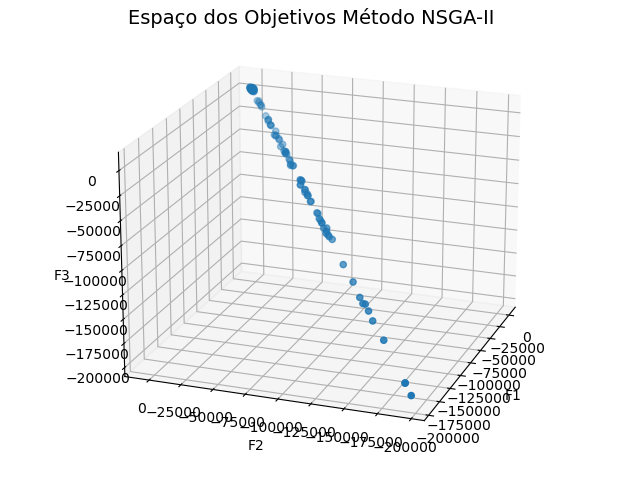

<IPython.core.display.Javascript object>


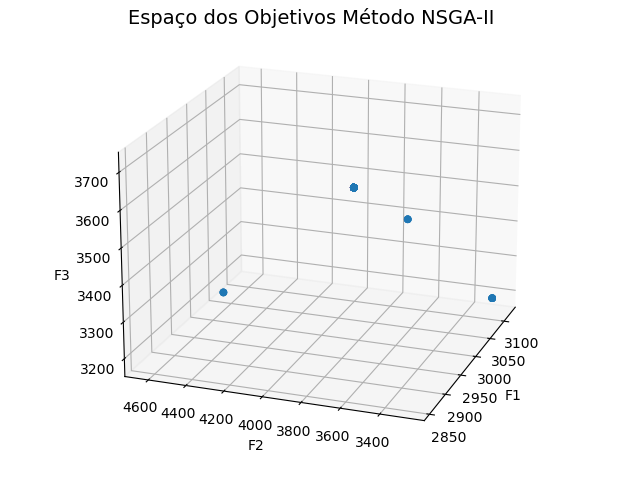

<IPython.core.display.Javascript object>


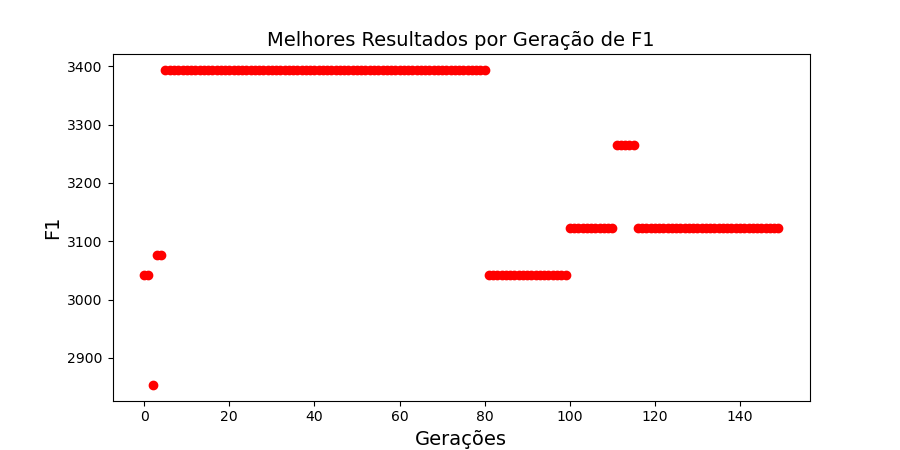

<IPython.core.display.Javascript object>


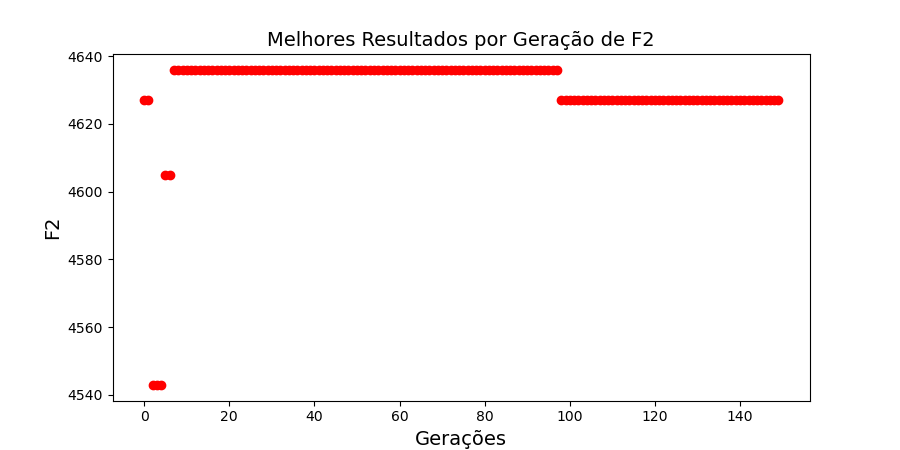

<IPython.core.display.Javascript object>


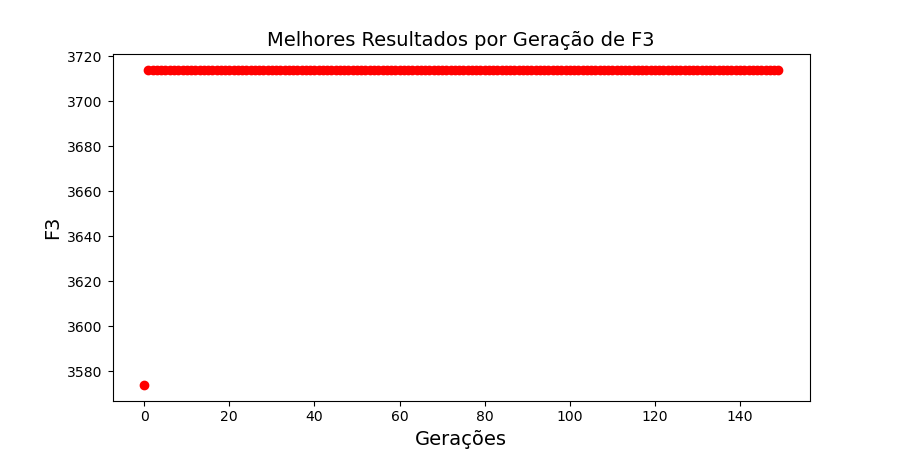

***Método NSGA-II***
Quantidade de pontos:  150
Tempo de execução:  12.534890413284302
________________________________
Média:  0.6093333333333333
Desvio:  0.48789980756526463
Melhor Indivíduo: 
Pior Indivíduo: 


In [88]:
main(arquivo='KP_p-3_n-10_ins-1.dat')

<IPython.core.display.Javascript object>


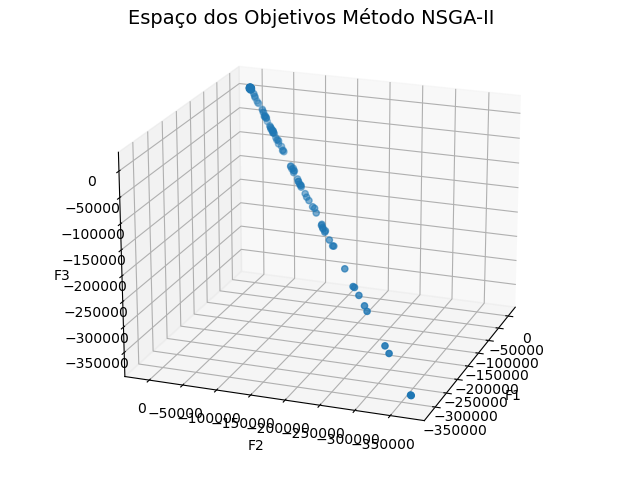

<IPython.core.display.Javascript object>


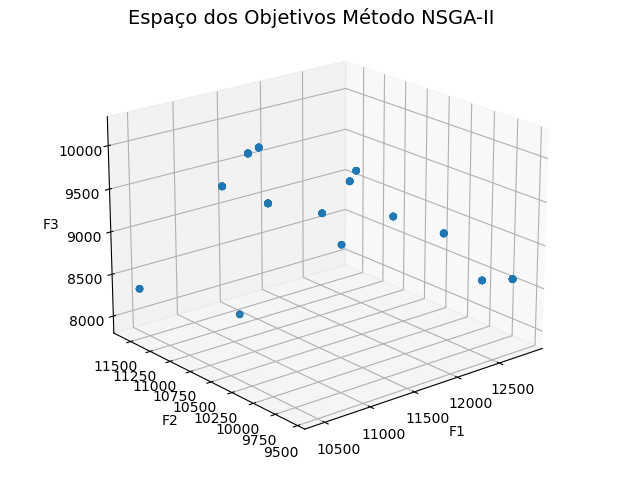

<IPython.core.display.Javascript object>


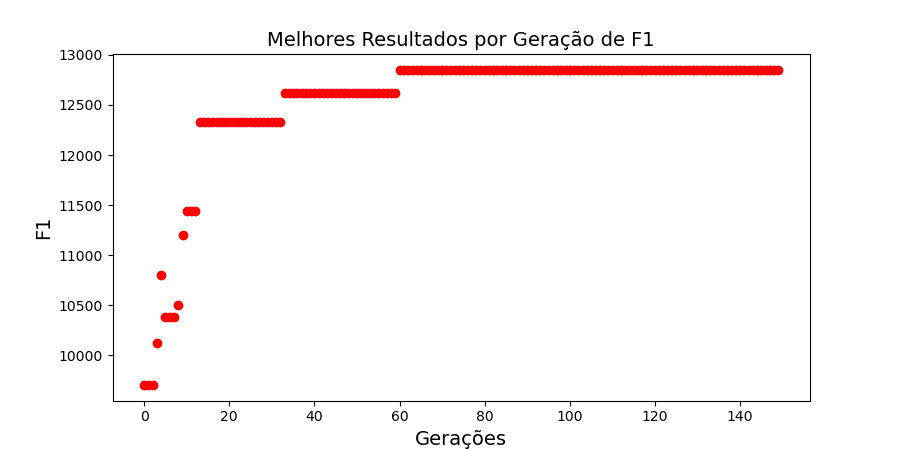

<IPython.core.display.Javascript object>


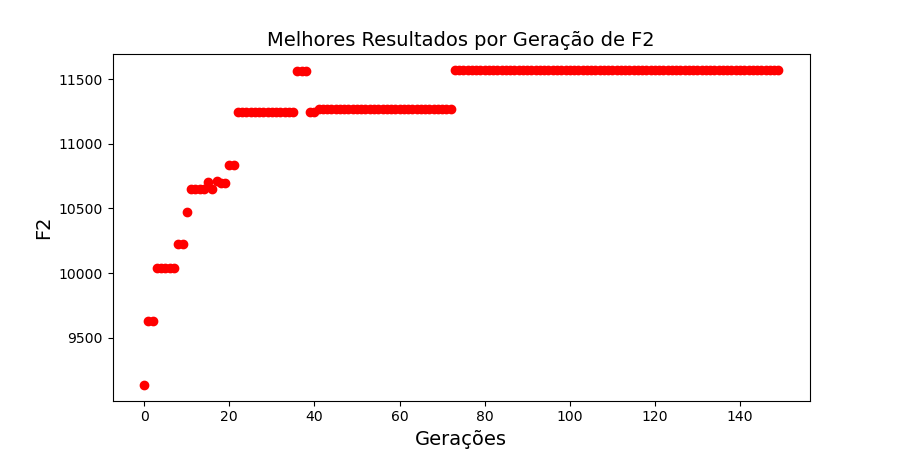

<IPython.core.display.Javascript object>


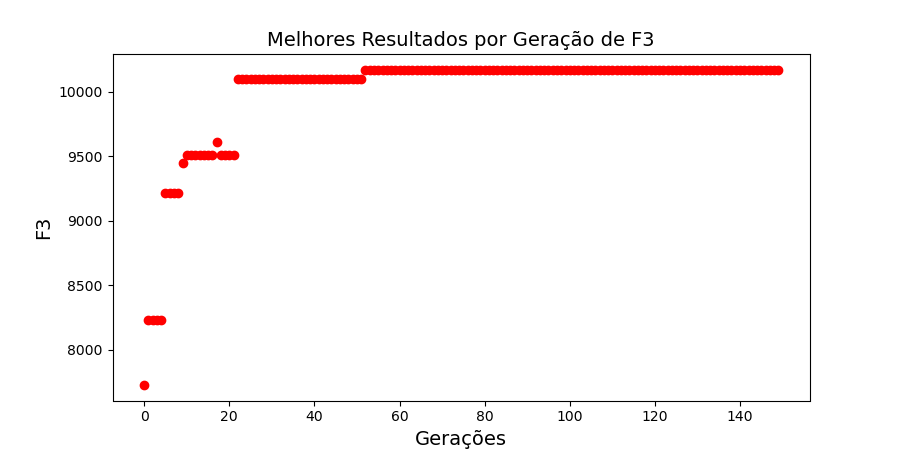

***Método NSGA-II***
Quantidade de pontos:  150
Tempo de execução:  8.242542505264282
________________________________
Média:  0.6895555555555556
Desvio:  0.4626755789514125
Melhor Indivíduo: 
Pior Indivíduo: 


In [89]:
main(arquivo='KP_p-3_n-30_ins-1.dat')

<IPython.core.display.Javascript object>


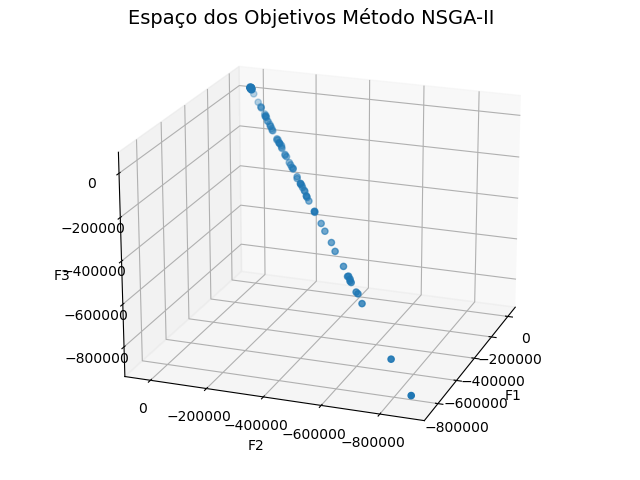

<IPython.core.display.Javascript object>


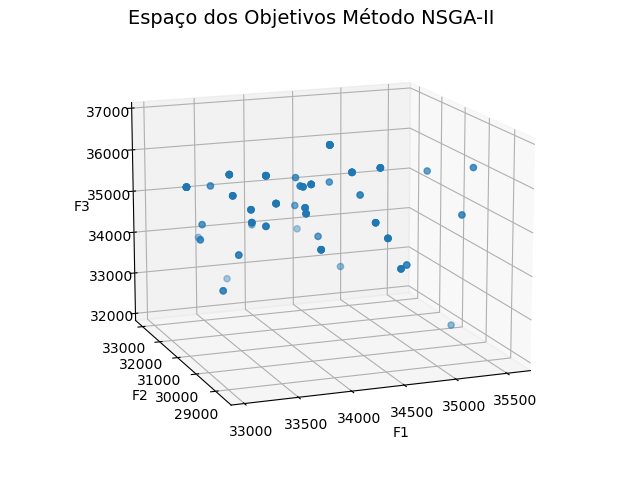

<IPython.core.display.Javascript object>


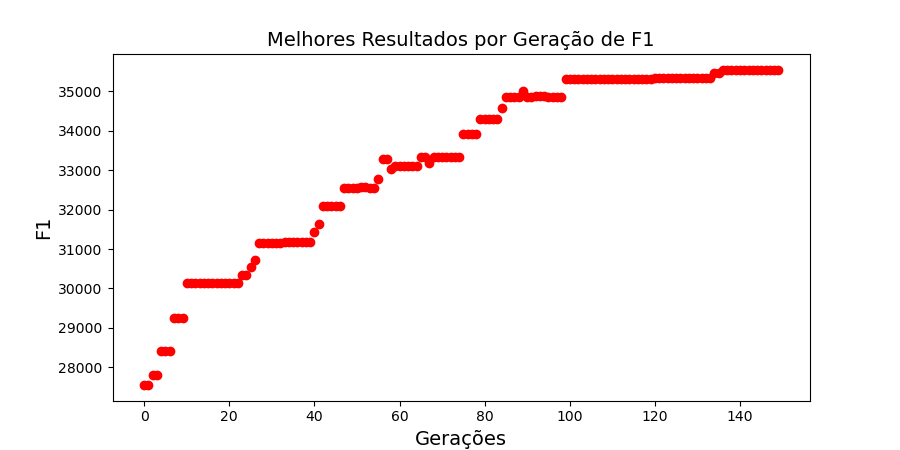

<IPython.core.display.Javascript object>


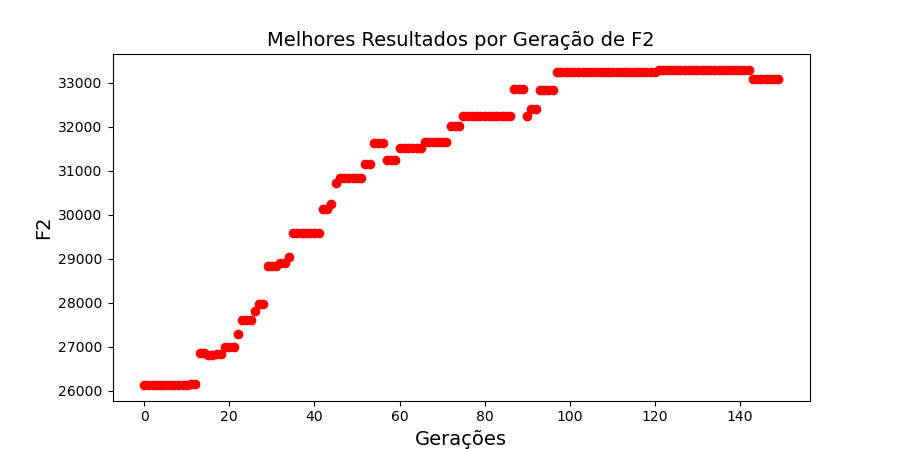

<IPython.core.display.Javascript object>


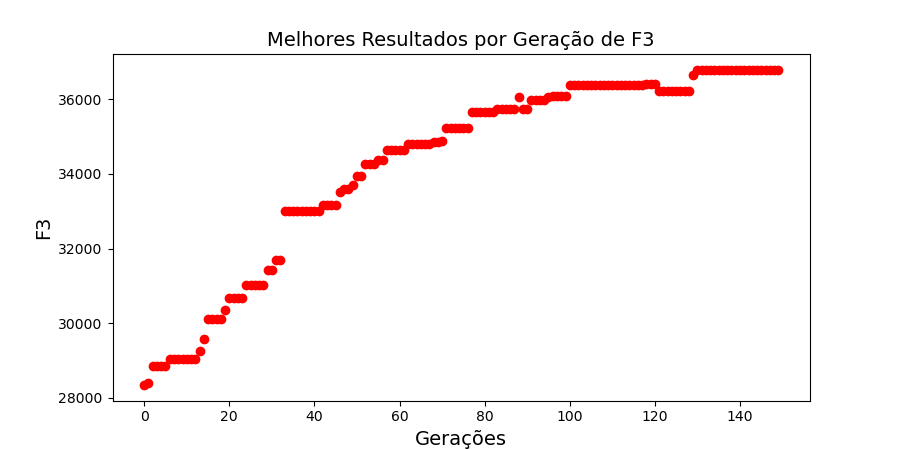

***Método NSGA-II***
Quantidade de pontos:  150
Tempo de execução:  7.183397531509399
________________________________
Média:  0.6330666666666667
Desvio:  0.4819681132836718
Melhor Indivíduo: 
Pior Indivíduo: 


In [90]:
main(arquivo='KP_p-3_n-100_ins-1.dat')

In [63]:
main(arquivo='KP_p-4_n-10_ins-1.dat')

***Método NSGA-II***
Quantidade de pontos:  150
Tempo de execução:  8.043226718902588
________________________________
Média:  0.6033333333333334
Desvio:  0.4892057054268912
Melhor Indivíduo: 
Pior Indivíduo: 


In [64]:
main(arquivo='KP_p-4_n-20_ins-1.dat')

***Método NSGA-II***
Quantidade de pontos:  150
Tempo de execução:  6.282522916793823
________________________________
Média:  0.657
Desvio:  0.47471149132920726
Melhor Indivíduo: 
Pior Indivíduo: 


In [65]:
main(arquivo='KP_p-5_n-10_ins-1.dat')

***Método NSGA-II***
Quantidade de pontos:  150
Tempo de execução:  7.616665840148926
________________________________
Média:  0.654
Desvio:  0.47569317842491715
Melhor Indivíduo: 
Pior Indivíduo: 


In [66]:
main(arquivo='KP_p-5_n-20_ins-10.dat')

***Método NSGA-II***
Quantidade de pontos:  150
Tempo de execução:  5.92572283744812
________________________________
Média:  0.6016666666666667
Desvio:  0.4895547864017764
Melhor Indivíduo: 
Pior Indivíduo: 
